# Data set description:
This dataset contains district-wise daily rainfall data for different states in India. The data helps in analyzing rainfall patterns, trends, and distributions across different regions.
The dataset contains 21,257 entries with the following columns:

State: Name of the state.

District: Name of the district.

Date: Date of recorded rainfall.

Year: Year of the data.

Month: Month of the data.

Avg_rainfall: Average rainfall recorded.

Agency_name: The source of the data.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("NRSC-rainfall-districtwise-jan22_0.csv")
df

,State,District,Date,Year,Month,Avg_rainfall,Agency_name
0,Andaman & Nicobar,Nicobar,2022-01-01,2022,1,0.000000,NRSC VIC MODEL
1,Andaman & Nicobar,Nicobar,2022-01-03,2022,1,0.000000,NRSC VIC MODEL
2,Andaman & Nicobar,Nicobar,2022-01-04,2022,1,0.000000,NRSC VIC MODEL
3,Andaman & Nicobar,Nicobar,2022-01-05,2022,1,0.000000,NRSC VIC MODEL
4,Andaman & Nicobar,Nicobar,2022-01-06,2022,1,0.000000,NRSC VIC MODEL
...,...,...,...,...,...,...,...
21252,West Bengal,Uttar Dinajpur,2022-01-26,2022,1,0.000071,NRSC VIC MODEL
21253,West Bengal,Uttar Dinajpur,2022-01-27,2022,1,0.000708,NRSC VIC MODEL
21254,West Bengal,Uttar Dinajpur,2022-01-28,2022,1,0.000142,NRSC VIC MODEL
21255,West Bengal,Uttar Dinajpur,2022-01-29,2022,1,0.000000,NRSC VIC MODEL


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21257 entries, 0 to 21256
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         21257 non-null  object 
 1   District      21257 non-null  object 
 2   Date          21257 non-null  object 
 3   Year          21257 non-null  int64  
 4   Month         21257 non-null  int64  
 5   Avg_rainfall  21257 non-null  float64
 6   Agency_name   21257 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Year,Month,Avg_rainfall
count,21257.0,21257.0,21257.000000
mean,2022.0,1.0,2.126571
std,0.0,0.0,7.979154
min,2022.0,1.0,-0.134380
25%,2022.0,1.0,0.000000
50%,2022.0,1.0,0.000267
75%,2022.0,1.0,0.290856
max,2022.0,1.0,263.062257


In [7]:
df.State.value_counts()

State
Uttar Pradesh           2175
Madhya Pradesh          1508
Bihar                   1102
Tamil Nadu              1073
Maharashtra             1044
Rajasthan                957
Assam                    957
Telangana                957
Gujarat                  957
Karnataka                870
Odisha                   870
Chhattisgarh             812
Arunachal Pradesh        725
Jharkhand                696
West Bengal              667
Jammu & Kashmir          638
Haryana                  638
Punjab                   638
Manipur                  464
Kerala                   406
Andhra Pradesh           377
Uttarakhand              377
Himachal Pradesh         348
Delhi                    319
Meghalaya                319
Nagaland                 319
Tripura                  232
Mizoram                  232
Sikkim                   116
Puducherry               116
Andaman & Nicobar         87
Goa                       58
Daman & Diu               58
Ladakh                    58
Lakshadw

In [8]:
df.Agency_name.value_counts()

Agency_name
NRSC VIC MODEL    21257
Name: count, dtype: int64

In [9]:
df.Month.value_counts()

Month
1    21257
Name: count, dtype: int64

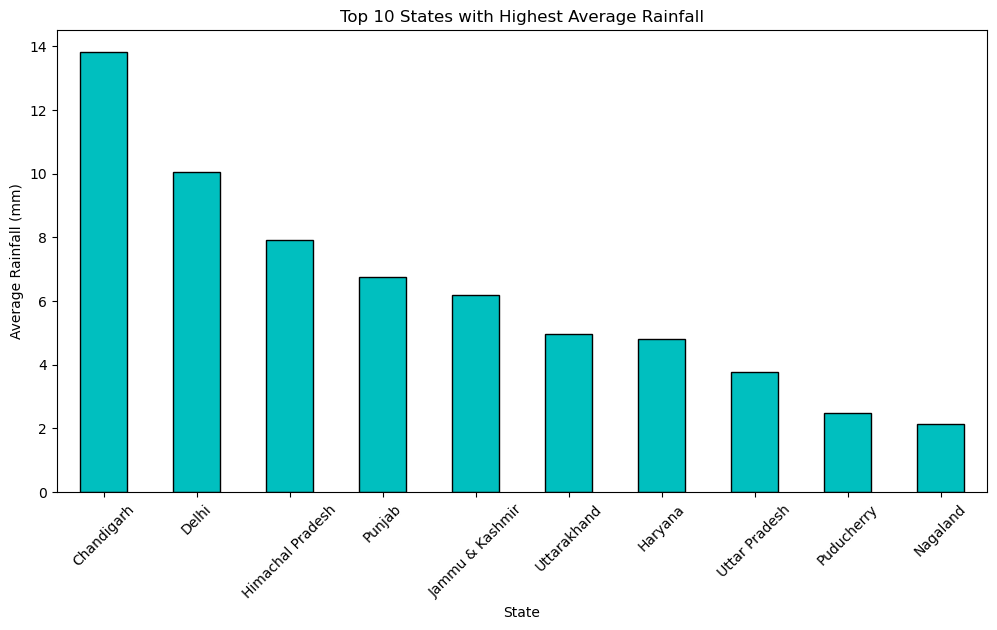

In [12]:
state_rainfall = df.groupby("State")["Avg_rainfall"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
state_rainfall.plot(kind='bar', color='c', edgecolor='black')
plt.xlabel("State")
plt.ylabel("Average Rainfall (mm)")
plt.title("Top 10 States with Highest Average Rainfall")
plt.xticks(rotation=45)
plt.show()

 A few states receive significantly higher rainfall than others. The gap between the highest and lowest states is quite large. Rainfall is unevenly distributed, with some states getting very high average rainfall.

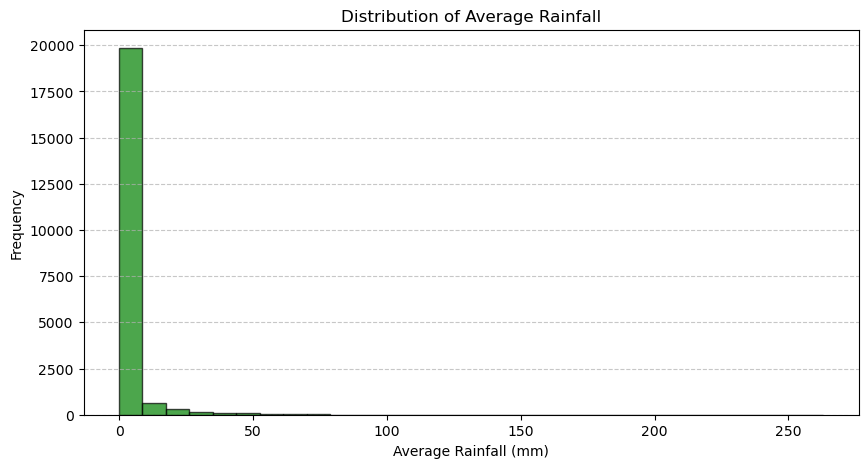

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(df['Avg_rainfall'], bins=30, color='g', edgecolor='black', alpha=0.7)
plt.xlabel("Average Rainfall (mm)")
plt.ylabel("Frequency")
plt.title("Distribution of Average Rainfall")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most regions experience low to moderate rainfall.There are some extreme values (high rainfall), but they are less frequent.a few places receive much more rainfall than the majority.

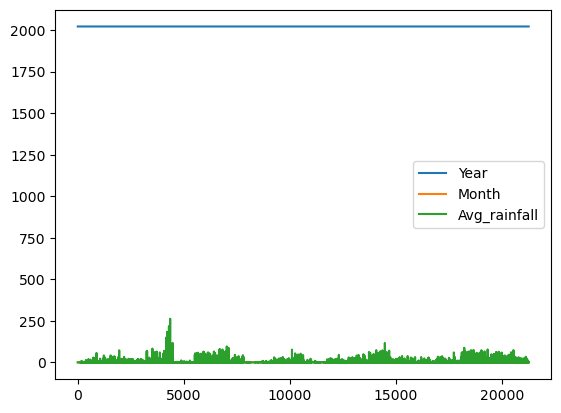

In [10]:
df.plot()
plt.show()

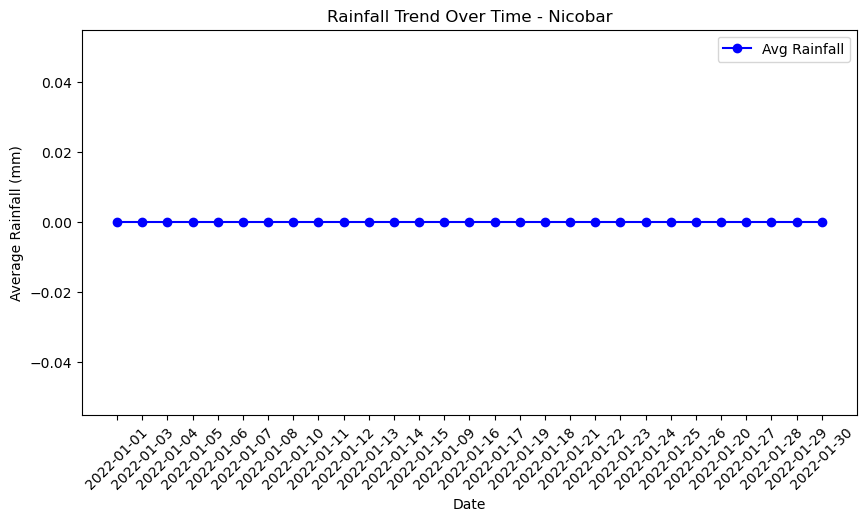

In [11]:
district_data = df[df['District'] == 'Nicobar']
plt.figure(figsize=(10, 5))
plt.plot(district_data['Date'], district_data['Avg_rainfall'], marker='o', linestyle='-', color='b', label='Avg Rainfall')
plt.xlabel("Date")
plt.ylabel("Average Rainfall (mm)")
plt.title("Rainfall Trend Over Time - Nicobar")
plt.xticks(rotation=45)
plt.legend()
plt.show()

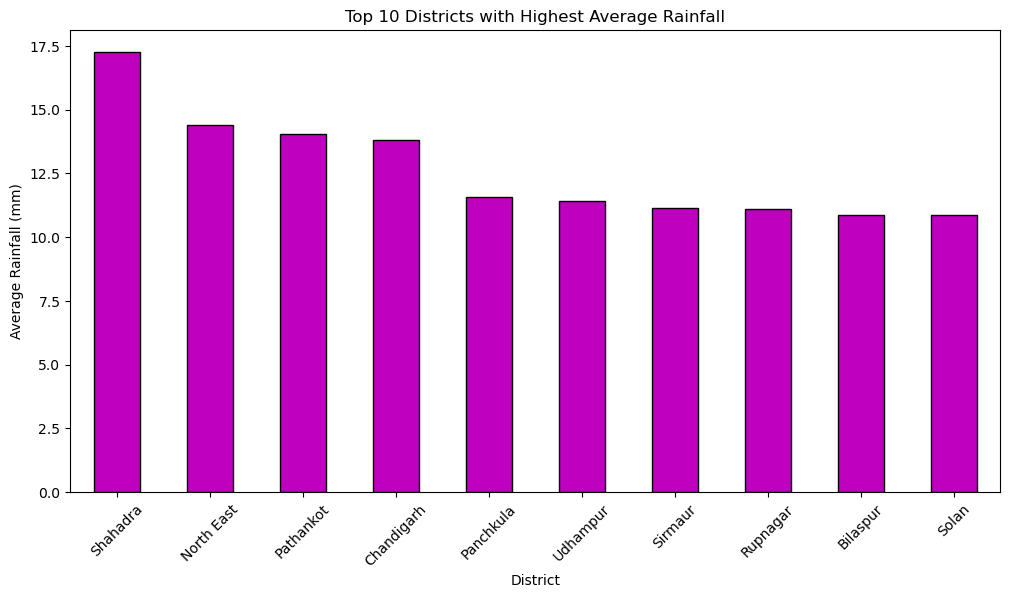

In [16]:
district_rainfall = df.groupby("District")["Avg_rainfall"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
district_rainfall.plot(kind='bar', color='m', edgecolor='black')
plt.xlabel("District")
plt.ylabel("Average Rainfall (mm)")
plt.title("Top 10 Districts with Highest Average Rainfall")
plt.xticks(rotation=45)
plt.show()

A few districts receive extremely high rainfall compared to the rest.These districts might be located in hilly or coastal regions.The difference in rainfall among the top districts is quite visible.

<Figure size 800x500 with 0 Axes>

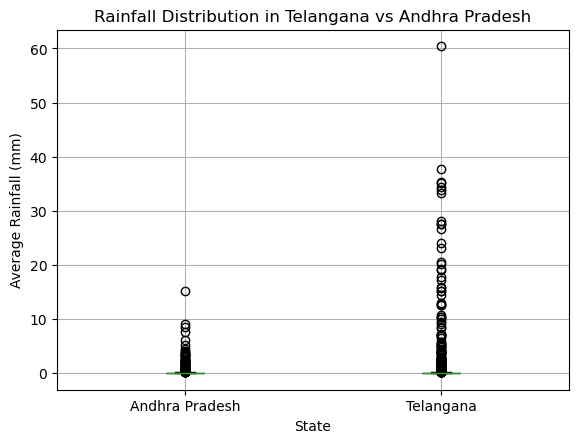

In [18]:
states_to_compare = ["Telangana", "Andhra Pradesh"] 
state_data = df[df["State"].isin(states_to_compare)]

plt.figure(figsize=(8, 5))
state_data.boxplot(column="Avg_rainfall", by="State", patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel("State")
plt.ylabel("Average Rainfall (mm)")
plt.title("Rainfall Distribution in Telangana vs Andhra Pradesh")
plt.suptitle("") 
plt.grid(True)
plt.show()

Andhra Pradesh, being a coastal state, likely experiences higher monsoon rainfall.Telangana has a more stable distribution but may experience occasional heavy rain.

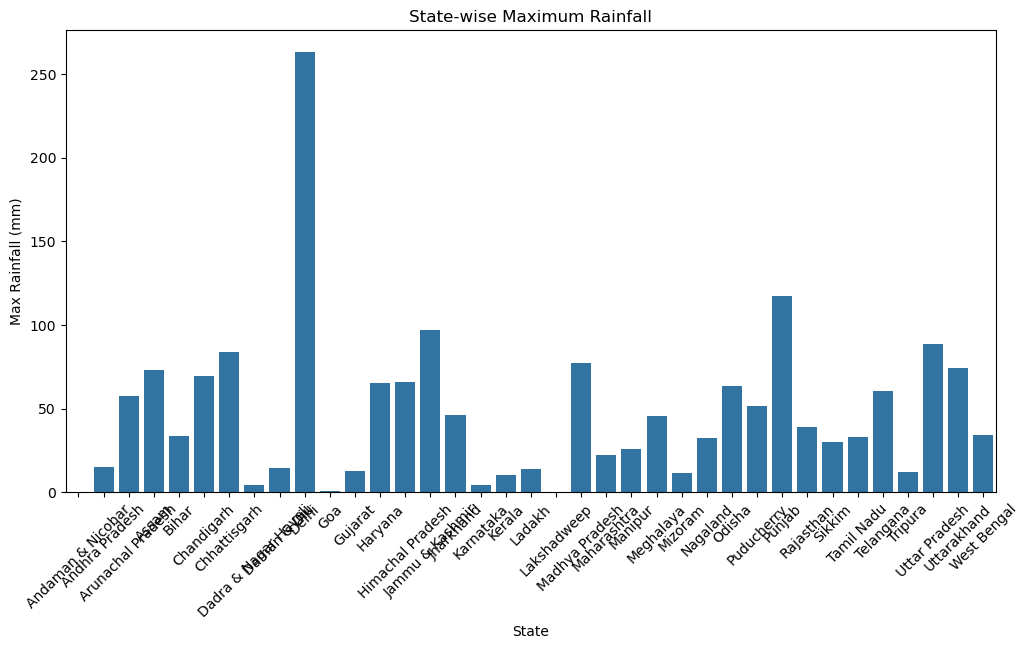

In [20]:
import seaborn as sns
max_rainfall_per_state = df.groupby("State")["Avg_rainfall"].max().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=max_rainfall_per_state, x="State", y="Avg_rainfall")
plt.xlabel("State")
plt.ylabel("Max Rainfall (mm)")
plt.title("State-wise Maximum Rainfall")
plt.xticks(rotation=45)
plt.show()

Delhi had the highest single-day rainfall peak among all states.Other states also recorded high rainfall, but none exceeded Delhi’s 263.06 mm.

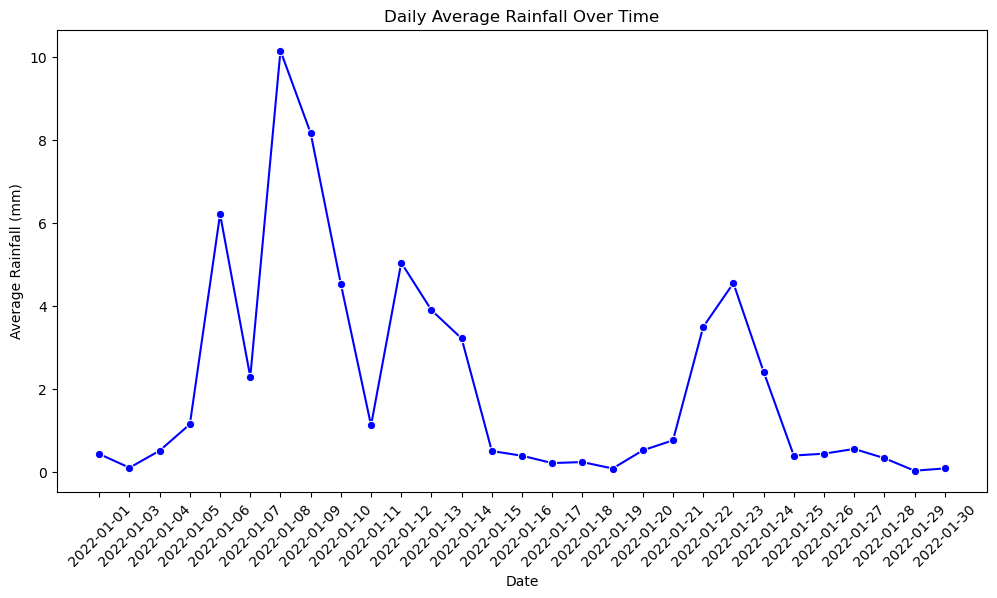

In [22]:
daily_avg_rainfall = df.groupby("Date")["Avg_rainfall"].mean().reset_index()

# 1. Daily Average Rainfall (Line Plot)
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg_rainfall, x="Date", y="Avg_rainfall", marker="o", color="b")
plt.xlabel("Date")
plt.ylabel("Average Rainfall (mm)")
plt.title("Daily Average Rainfall Over Time")
plt.xticks(rotation=45)
plt.show()

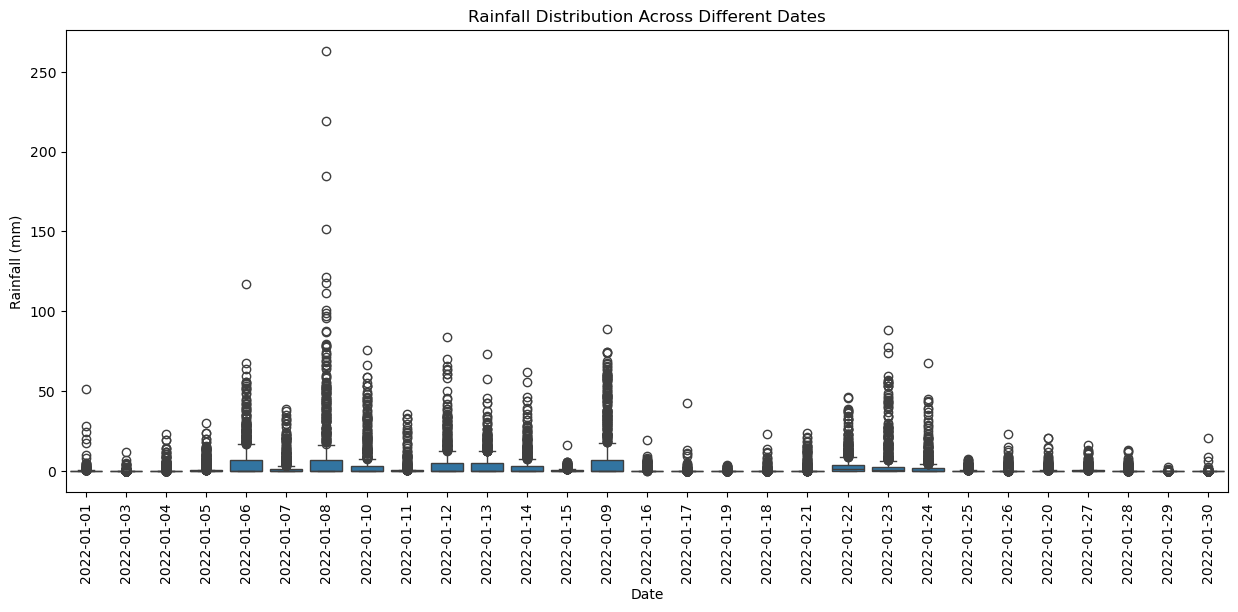

In [23]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="Date", y="Avg_rainfall")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall Distribution Across Different Dates")
plt.xticks(rotation=90)
plt.show()

 2022-01-07 experienced highest rainfall in january month

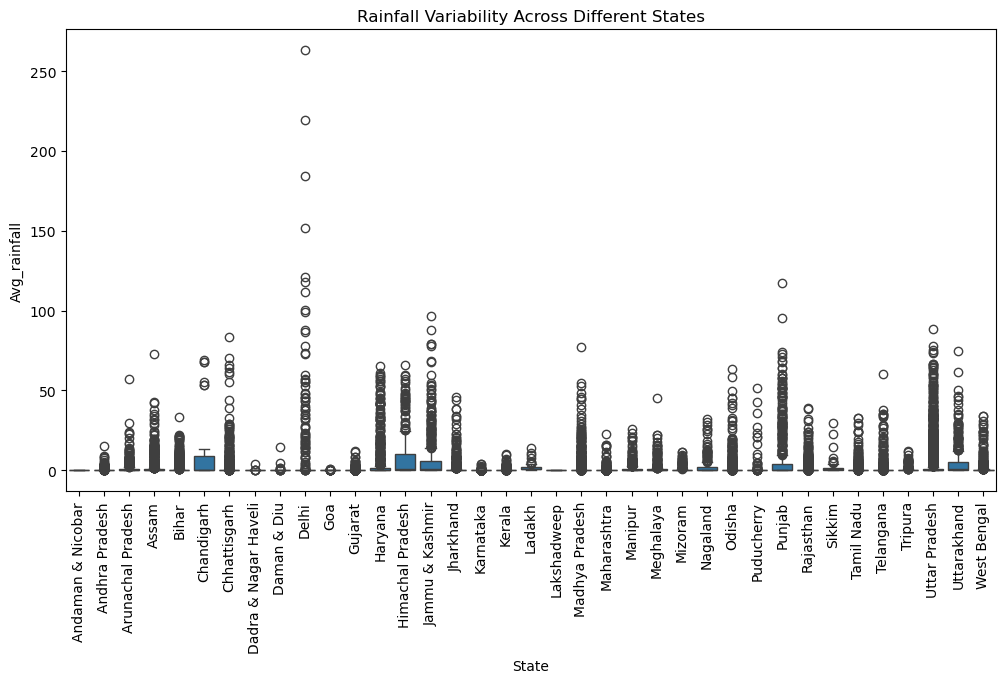

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="State", y="Avg_rainfall", data=df)
plt.xticks(rotation=90)
plt.title("Rainfall Variability Across Different States")
plt.show()


 Some states have higher median rainfall than others.States with longer whiskers show high variability in rainfall.Outliers (dots) indicate extreme rainfall events in some states.

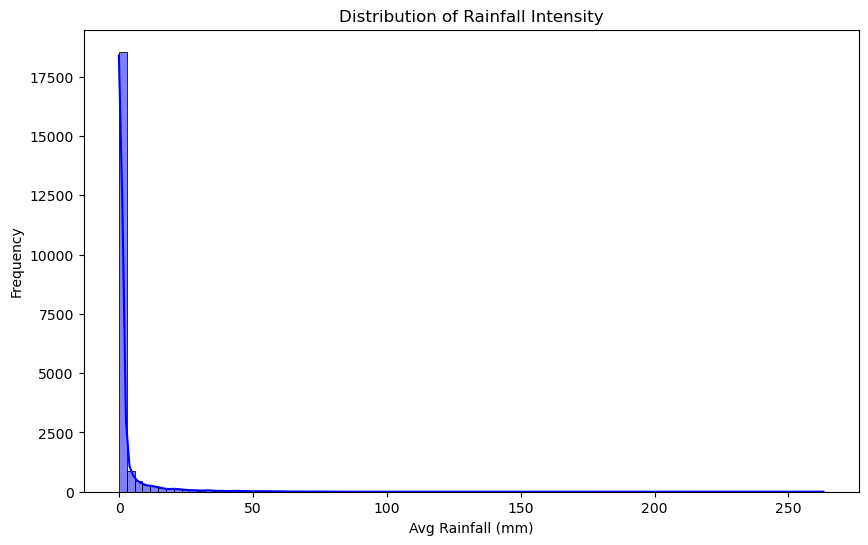

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Avg_rainfall"], bins=90, kde=True, color="blue")
plt.title("Distribution of Rainfall Intensity")
plt.xlabel("Avg Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

Most rainfall values are on the lower side, indicating many days with low rainfall.

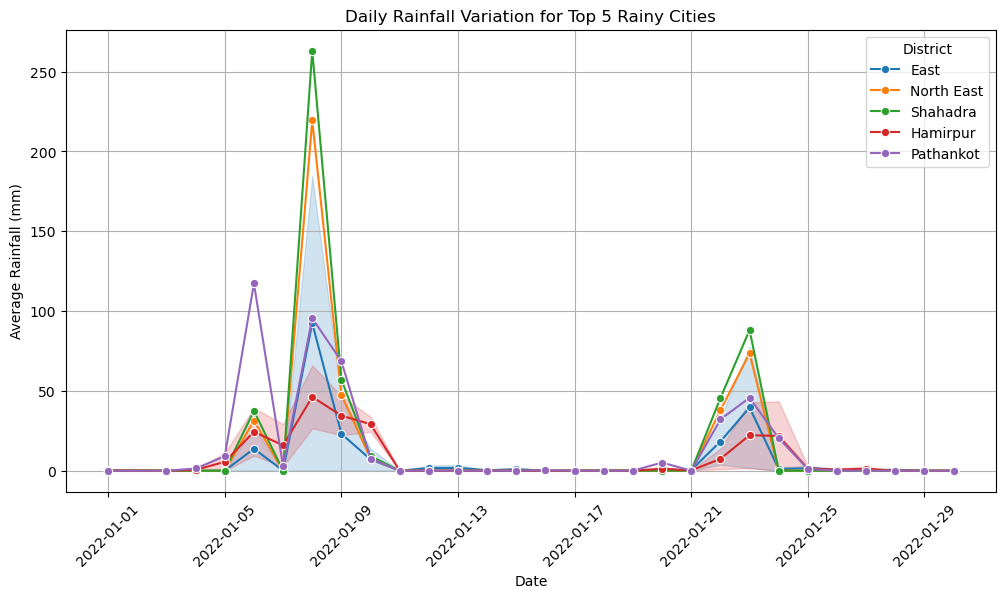

In [94]:
import seaborn as sns


top_cities = df.groupby("District")["Avg_rainfall"].sum().nlargest(5).index


df_top_cities = df[df["District"].isin(top_cities)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_cities, x="Date", y="Avg_rainfall", hue="District", marker="o")

plt.xlabel("Date")
plt.ylabel("Average Rainfall (mm)")
plt.title("Daily Rainfall Variation for Top 5 Rainy Cities")
plt.xticks(rotation=45)
plt.legend(title="District")
plt.grid()
plt.show()


 Rainfall patterns vary significantly across cities, indicating different climatic influences.Some cities experience sharp peaks, suggesting extreme rainfall events. Helps in urban planning, flood prediction, and weather forecasting.

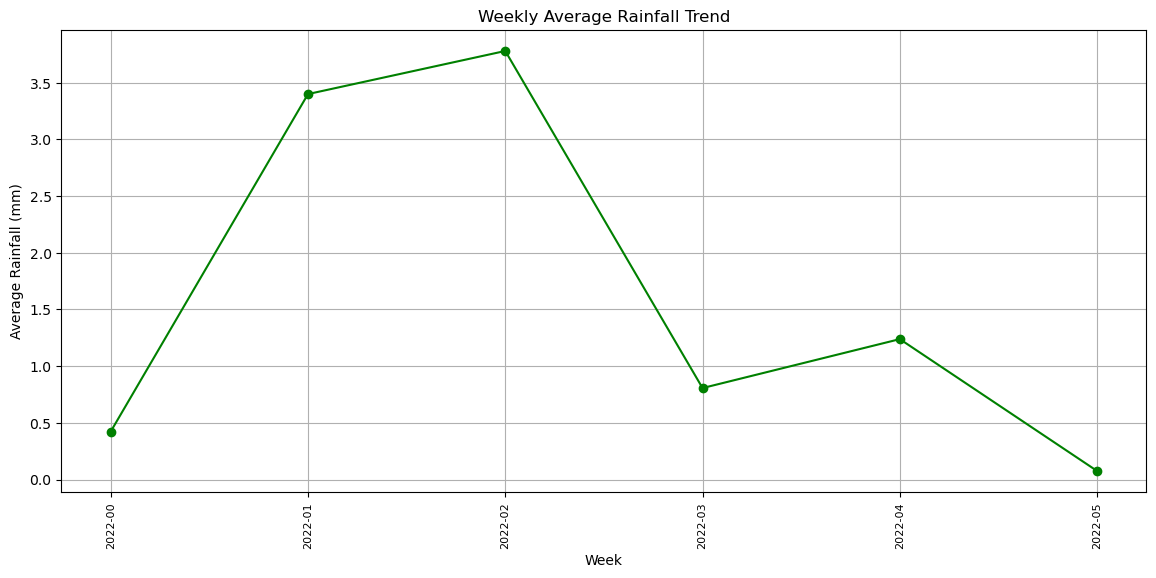

In [97]:

df["Week"] = df["Date"].dt.strftime('%Y-%U')

weekly_avg_rainfall = df.groupby("Week")["Avg_rainfall"].mean()


plt.figure(figsize=(14, 6))
plt.plot(weekly_avg_rainfall.index, weekly_avg_rainfall, marker='o', linestyle='-', color='g')
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("Week")
plt.ylabel("Average Rainfall (mm)")
plt.title("Weekly Average Rainfall Trend")
plt.grid()
plt.show()


 Rainfall fluctuates significantly week by week, indicating short-term weather variations.Certain weeks show sharp peaks, which could be due to storms or monsoon surges.Helps in short-term weather predictions and disaster management.

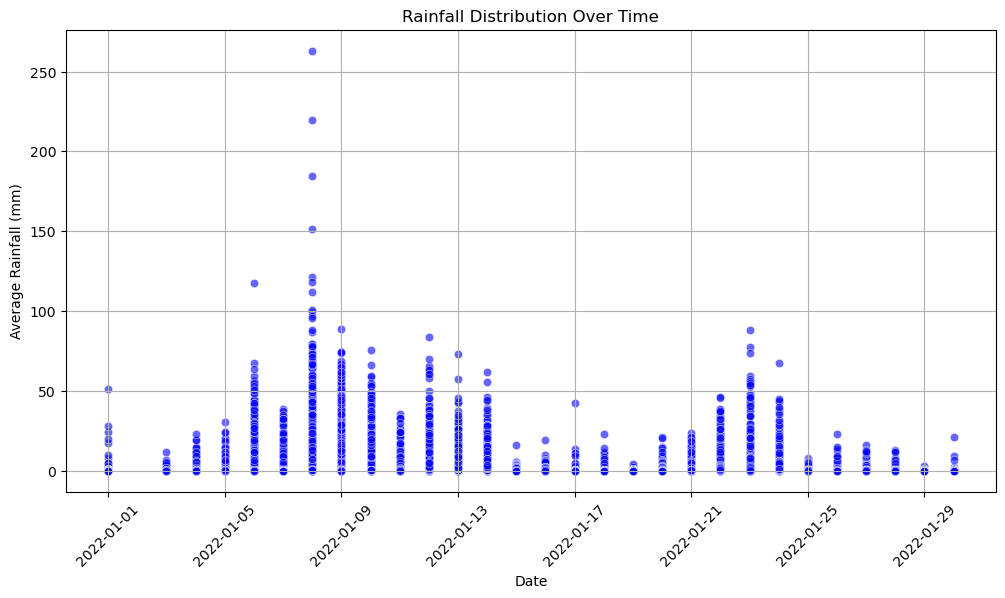

In [100]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Date", y="Avg_rainfall", alpha=0.6, color="b")

plt.xlabel("Date")
plt.ylabel("Average Rainfall (mm)")
plt.title("Rainfall Distribution Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


 Rainfall is not evenly distributed—peaks appear during monsoon months. Some outliers show extreme rainfall events, possibly cyclones or heavy monsoons.Helps in identifying rainy and dry periods for better water resource planning.

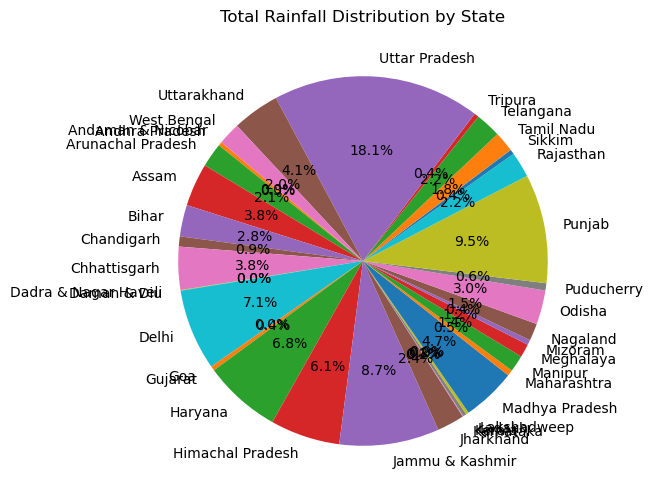

In [25]:
df_ml = df.dropna(subset=["State", "Avg_rainfall"]).copy()


state_rainfall = df_ml.groupby("State")["Avg_rainfall"].sum()


plt.figure(figsize=(10, 6))
plt.pie(state_rainfall, labels=state_rainfall.index, autopct='%1.1f%%', startangle=140)

plt.title("Total Rainfall Distribution by State")
plt.show()

 Uttar Pradesh has more rainfall distribution in january 2022

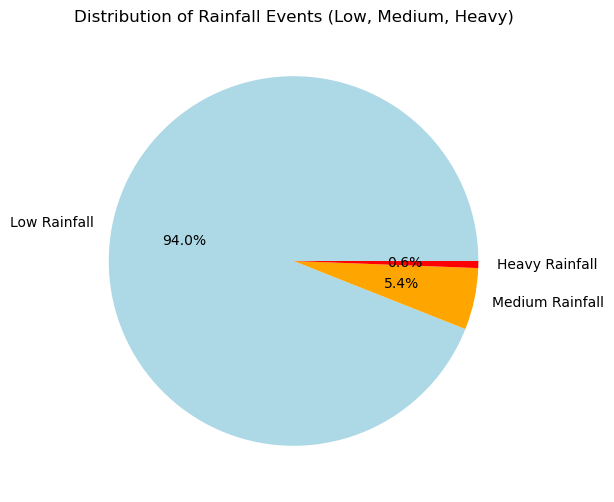

In [87]:

def classify_rainfall(value):
    if value < 10:
        return "Low Rainfall"
    elif 10 <= value <= 50:
        return "Medium Rainfall"
    else:
        return "Heavy Rainfall"

df["Rainfall_Category"] = df["Avg_rainfall"].apply(classify_rainfall)


rainfall_counts = df["Rainfall_Category"].value_counts()


plt.figure(figsize=(8, 6))
plt.pie(rainfall_counts, labels=rainfall_counts.index, autopct='%1.1f%%', colors=["lightblue", "orange", "red"])
plt.title("Distribution of Rainfall Events (Low, Medium, Heavy)")
plt.show()


The dataset mostly contains low to medium rainfall events, meaning heavy rainfall is rare.

# #statistics 

In [28]:
from scipy.stats import ttest_ind, chi2_contingency

In [29]:
df_telangana = df[df["State"] == "Telangana"]["Avg_rainfall"].dropna()
df_andhra = df[df["State"] == "Andhra Pradesh"]["Avg_rainfall"].dropna()

t_stat, p_value_ttest = ttest_ind(df_telangana, df_andhra, equal_var=False)

print("T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value_ttest:.4f}")

T-Test Results:
T-Statistic: 3.8948
P-Value: 0.0001


In [30]:
df["Rainfall_Category"] = pd.cut(df["Avg_rainfall"], bins=[-1, 10, 50, float("inf")], labels=["Low", "Moderate", "High"])


contingency_table = pd.crosstab(df["State"], df["Rainfall_Category"])


chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value_chi2:.4e}")


Chi-Square Test Results:
Chi-Square Statistic: 1669.0219
P-Value: 6.7759e-301


In [31]:
northern_states = ["Delhi", "Punjab", "Haryana", "Uttar Pradesh", "Rajasthan"]
southern_states = ["Telangana", "Andhra Pradesh", "Karnataka", "Tamil Nadu", "Kerala"]
df_north = df[df["State"].isin(northern_states)]["Avg_rainfall"].dropna()
df_south = df[df["State"].isin(southern_states)]["Avg_rainfall"].dropna()
t_stat_north_south, p_value_north_south = ttest_ind(df_north, df_south, equal_var=False)
print("\nT-Test: Northern vs Southern States")
print(f"T-Statistic: {t_stat_north_south:.4f}, P-Value: {p_value_north_south:.4e}")


T-Test: Northern vs Southern States
T-Statistic: 18.5473, P-Value: 1.8284e-74


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score

In [33]:
df_ml = df.dropna(subset=["Date", "State", "Avg_rainfall"]).copy()
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop rows with missing values in important columns
df_ml = df.dropna(subset=["Date", "State", "Avg_rainfall"]).copy()

# Convert 'Date' to numerical format (days since first date in dataset)
df_ml["Date"] = (df_ml["Date"] - df_ml["Date"].min()).dt.days

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_ml["State"] = label_encoder.fit_transform(df_ml["State"])



In [34]:
X = df_ml[["Date", "State"]] 
y = df_ml["Avg_rainfall"] 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [36]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [37]:
print("Linear Regression Results:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f} mm")
print(f"R² Score: {r2_lr:.3f}")

Linear Regression Results:
Mean Absolute Error (MAE): 3.44 mm
R² Score: 0.016


# Overall Observation:
